In [6]:
import numpy as np
DTYPE = np.float64
# epsilon = np.finfo(DTYPE).eps
epsilon = 1e-3

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import pandas as pd

import os

In [7]:
# mol vol.s same for different species

def floryHugginsFreeEnergy(phi:DTYPE, chi:DTYPE):
    res = phi*np.log(phi) + (1-phi)*np.log(1-phi) + chi*phi*(1-phi)
    return res

In [3]:
def plotter(sample):
    fig = plt.figure(figsize=(10, 10))
        
    ax = fig.add_subplot(3, 2, 1, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['phi11'], sample['eta1'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\phi_{11}$")
    ax.set_ylabel(r"$\eta_1$")
    ax.set_zlabel('F')
    
    ax = fig.add_subplot(3, 2, 2, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['phi11'], sample['eta2'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\phi_{11}$")
    ax.set_ylabel(r"$\eta_2$")
    ax.set_zlabel('F')
    
    ax = fig.add_subplot(3, 2, 3, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['phi12'], sample['eta1'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\phi_{12}$")
    ax.set_ylabel(r"$\eta_1$")
    ax.set_zlabel('F')
    
    ax = fig.add_subplot(3, 2, 4, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['phi12'], sample['eta2'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\phi_{12}$")
    ax.set_ylabel(r"$\eta_2$")
    ax.set_zlabel('F')
    
    ax = fig.add_subplot(3, 2, 5, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['phi11'], sample['phi12'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\phi_{11}$")
    ax.set_ylabel(r"$\phi_{12}$")
    ax.set_zlabel('F')
    
    ax = fig.add_subplot(3, 2, 6, projection='3d')
    # sizes = (df['F'] + df['F'].min()) / (df['F'].max() + df['F'].min())*5  # Normalized
    ax.scatter(sample['eta1'], sample['eta2'], sample['F'], c=sample['F'], cmap='viridis', s = 1)
    ax.set_xlabel(r"$\eta_1$")
    ax.set_ylabel(r"$\eta_2$")
    ax.set_zlabel('F')
    
    title = r"$\phi_1^{\text{global}}$ = " + f"{PHI1_GLOBAL:.3f}" + "\n" + r"$\chi = $" + f"{chi:.3f}"
    fig.suptitle(title)
    
    # pivot = sample.pivot(index='eta1', columns='phi11', values='F')
    
    # sns.heatmap(pivot, cmap='viridis', ax = ax)
    
    # ax.set_xticks(np.arange(0, len(pivot.columns), 100))
    # ax.set_xticklabels( [f"{val:.3f}" for val in pivot.columns[::100]], rotation=90)
    # ax.set_xlabel(r"$\phi_{11}$")
    
    # ax.set_yticks(np.arange(0, len(pivot.index), 100))
    # ax.set_yticklabels([f"{val:.3f}" for val in pivot.index[::100]], rotation=0);
    # ax.set_ylabel(r"$\eta_1$")
    
    fig.tight_layout()

In [8]:
'''
System Parameters:

Given: the total concentration of component 1 in the system
'''
PHI1_GLOBALs = [DTYPE(0.7)] # Setting the global value of the first component in the system
# PHI1_GLOBALs = DTYPE(np.linspace(epsilon, 1-epsilon, 3)) # Setting the global value of the first component in the system

ETA_GLOBAL = DTYPE(1) # Setting the global system size as 1

'''
Flory Parameter(s)
'''
CHIs = [DTYPE(2.2)] # test chi
# CHIs = DTYPE(np.linspace(1, 3, 3))

'''
Compartment Parameters

phi11: concentration of component 1 in compartment 1 -> randomly chosen from a uniform distribution u(0, PHI1_GLOBAL)
phi12: concentration of component 1 in compartment 2
phi21: concentration of component 2 in compartment 1
phi22: concentration of component 2 in compartment 2

eta1: size of compartment 1
'''

# eta1 = np.linspace(0, ETA_GLOBAL, 10, dtype=DTYPE) # Size of compartment 1
# eta1 = DTYPE(np.random.uniform(epsilon, ETA_GLOBAL-epsilon, size=1000))
# eta2 = 1 - eta1

'\nCompartment Parameters\n\nphi11: concentration of component 1 in compartment 1 -> randomly chosen from a uniform distribution u(0, PHI1_GLOBAL)\nphi12: concentration of component 1 in compartment 2\nphi21: concentration of component 2 in compartment 1\nphi22: concentration of component 2 in compartment 2\n\neta1: size of compartment 1\n'

In [13]:
'''
THIS IS AWFUL-> LOOK FOR A BETTER LOOPING MECHANISM!
'''

for chi in CHIs:
    for PHI1_GLOBAL in PHI1_GLOBALs:

        ctr = 0

        acceptable_phi11s = []
        acceptable_phi12s = []
        acceptable_eta1s = []
        acceptable_eta2s = []
        acceptable_fs = []
        
        for eta_1 in tqdm(DTYPE(np.linspace(0+epsilon, 1-epsilon, 100))): # Setting the compartment 1 size for the system
            for eta_2 in DTYPE(np.linspace(0+epsilon, 1-eta_1-epsilon, 100)): # Setting the compartment 2 size for the system
                for phi_11 in DTYPE(np.linspace(0+epsilon, 1-epsilon, 100)): # Setting the concentration of component 1 in the first compartment
                    for phi_12 in DTYPE(np.linspace(0+epsilon, 1-epsilon, 100)): # Setting the concentration of component 1 in the second compartment
                        phi_13 = (PHI1_GLOBAL - (phi_11*eta_1) - (phi_12*eta_2))/(1-eta_1 - eta_2)

                        if (phi_13 >= 0 and phi_13 <= 1):
                            ctr += 1
                            
                            # acceptable_phi11s.append(phi_11)
                            # acceptable_phi12s.append(phi_12)

                            # acceptable_eta1s.append(eta_1)
                            # acceptable_eta2s.append(eta_2)

                            # f1 = floryHugginsFreeEnergy(phi_11, chi)
                            # f2 = floryHugginsFreeEnergy(phi_12, chi)
                            # f3 = floryHugginsFreeEnergy(phi_13, chi)
                            
                            # f = eta_1*f1 + eta_2*f2 + (1-eta_1-eta_2)*f3
                            # acceptable_fs.append(f)

        # df = pd.DataFrame()
        # df["phi11"] = acceptable_phi11s
        # df["phi12"] = acceptable_phi12s
        # df["eta1"] = acceptable_eta1s
        # df["eta2"] = acceptable_eta2s
        # df["F"] = acceptable_fs

        # df["log|F|"] = np.log(np.abs(df["F"]))

        # sample = df.sample(n=10000, random_state=42) 
        # plotter(sample)
        
        # output_filepath = f"data/chi-{chi:.3f}"
        # output_filename = f"phi_g-{PHI1_GLOBAL:.3f}.png"
        
        # if not os.path.exists(output_filepath):
        #     os.makedirs(output_filepath)
        
        # file = os.path.join(output_filepath, output_filename)     
        
        # plt.savefig(file, dpi = 400)
        # plt.close()
        
        # print(f"Saved @ {file}")

100%|█████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


In [14]:
ctr/1e12

3.2657381e-05

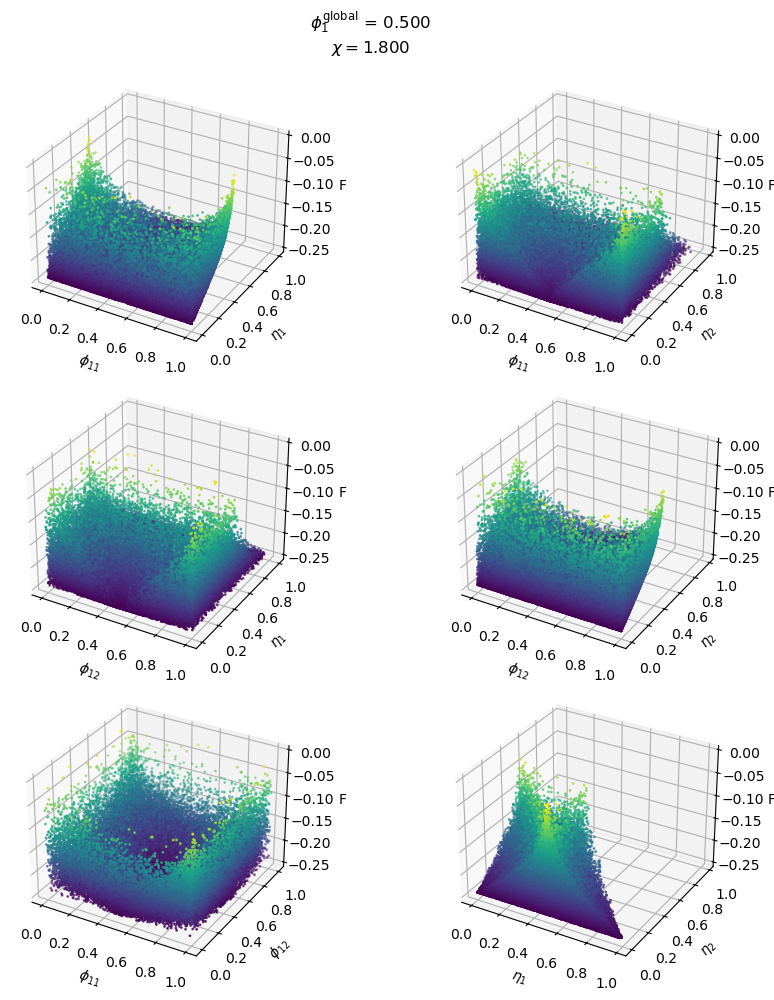